In [1]:
!unzip /content/dbz.zip

Archive:  /content/dbz.zip
   creating: DB dataset/
   creating: DB dataset/Training/
   creating: DB dataset/Training/goku/
  inflating: DB dataset/Training/goku/63.jpg  
  inflating: DB dataset/Training/goku/77.jpg  
  inflating: DB dataset/Training/goku/88.jpg  
  inflating: DB dataset/Training/goku/89.jpg  
  inflating: DB dataset/Training/goku/76.jpg  
  inflating: DB dataset/Training/goku/62.jpg  
  inflating: DB dataset/Training/goku/74.jpg  
  inflating: DB dataset/Training/goku/60.jpg  
  inflating: DB dataset/Training/goku/48.jpg  
  inflating: DB dataset/Training/goku/49.jpg  
  inflating: DB dataset/Training/goku/61.jpg  
  inflating: DB dataset/Training/goku/75.jpg  
  inflating: DB dataset/Training/goku/59.jpg  
  inflating: DB dataset/Training/goku/71.jpg  
  inflating: DB dataset/Training/goku/65.jpg  
  inflating: DB dataset/Training/goku/64.jpg  
  inflating: DB dataset/Training/goku/70.jpg  
  inflating: DB dataset/Training/goku/58.jpg  
  inflating: DB dataset/Train

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import os
import cv2

In [3]:
print(len(os.listdir('/content/DB dataset/Training/goku')))
print(len(os.listdir('/content/DB dataset/Training/vegeta')))
print(len(os.listdir('/content/DB dataset/Testing/goku')))
print(len(os.listdir('/content/DB dataset/Testing/vegeta')))

207
246
110
110


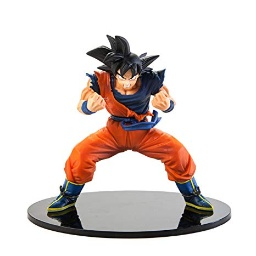

          Goku Image 1



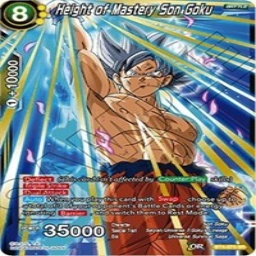

          Goku Image 2



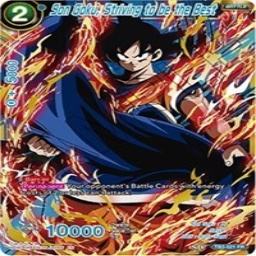

          Goku Image 3



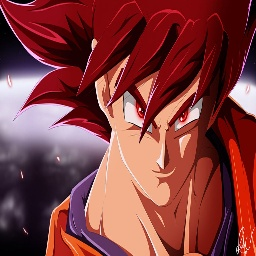

          Goku Image 4



In [12]:
from google.colab.patches import cv2_imshow
folder="/content/DB dataset/Training/goku"
i=0
for x in os.listdir(folder):
  path=os.path.join(folder,x)
  img=cv2.imread(path)
  cv2_imshow(img)
  print("          Goku Image {}".format(i+1))
  print()
  i+=1
  if i>3:
    break;

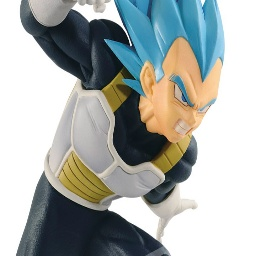

         Vegeta Image 1



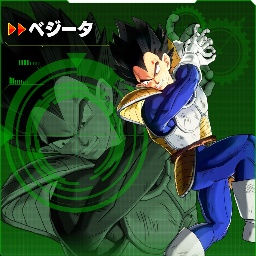

         Vegeta Image 2



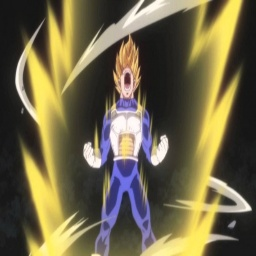

         Vegeta Image 3



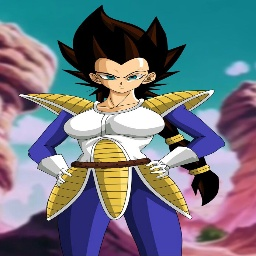

         Vegeta Image 4



In [14]:
folder="/content/DB dataset/Training/vegeta"
i=0
for x in os.listdir(folder):
  path=os.path.join(folder,x)
  img=cv2.imread(path)
  cv2_imshow(img)
  print("         Vegeta Image {}".format(i+1))
  print()
  i+=1
  if i>3:
    break;

In [17]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [27]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 32)       

In [30]:
TRAINING_DIR = "/content/DB dataset/Training/"
train_datagen = ImageDataGenerator(rescale=1.0/255., 
                                   rotation_range=40,
                                   zoom_range=0.3,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=50,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/content/DB dataset/Testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.,
                                        rotation_range=40,
                                        zoom_range=0.3,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        horizontal_flip=True,
                                        shear_range=0.2,
                                        fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=50,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 453 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [31]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=5,
                    validation_data=validation_generator)

Epoch 1/25
5/5 [==============================] - 3s 746ms/step - loss: 0.6220 - accuracy: 0.6960 - val_loss: 0.5568 - val_accuracy: 0.7500
Epoch 2/25
5/5 [==============================] - 3s 600ms/step - loss: 0.5618 - accuracy: 0.7340 - val_loss: 0.5690 - val_accuracy: 0.7318
Epoch 3/25
5/5 [==============================] - 3s 599ms/step - loss: 0.5702 - accuracy: 0.7143 - val_loss: 0.7168 - val_accuracy: 0.6455
Epoch 4/25
5/5 [==============================] - 3s 595ms/step - loss: 0.5755 - accuracy: 0.6847 - val_loss: 0.7549 - val_accuracy: 0.6045
Epoch 5/25
5/5 [==============================] - 3s 609ms/step - loss: 0.7152 - accuracy: 0.6847 - val_loss: 0.5844 - val_accuracy: 0.6955
Epoch 6/25
5/5 [==============================] - 3s 602ms/step - loss: 0.5195 - accuracy: 0.7586 - val_loss: 0.8409 - val_accuracy: 0.6591
Epoch 7/25
5/5 [==============================] - 3s 610ms/step - loss: 0.6217 - accuracy: 0.7094 - val_loss: 0.5668 - val_accuracy: 0.7227
Epoch 8/25
5/5 [====

In [32]:
# Model has an accuracy of about 70%

Saving Dgp2p70.png to Dgp2p70.png
[0.40130115]

 This is Goku!



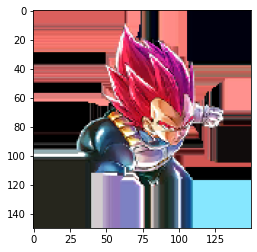

In [60]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [37]:
classes
#This is lesser than 0.5, hence the model predicts the image to be Goku!!
#But it is Vegeta!
#Prediction is Wrong!

array([[0.9477228]], dtype=float32)

Saving 61-NUVys2bL._SY606_.jpg to 61-NUVys2bL._SY606_ (2).jpg
[0.44253963]

 This is Goku!



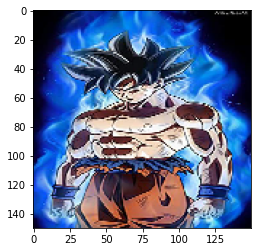

In [59]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [64]:
#Since the value of classes is less than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!

Saving artworks-y1WcOJwtzfhThB5i-kDG3rg-t500x500-min.jpg to artworks-y1WcOJwtzfhThB5i-kDG3rg-t500x500-min (1).jpg
[0.98272574]

 This is Vegeta!



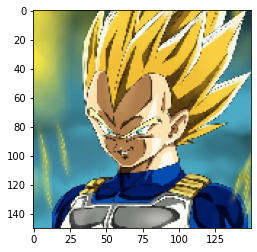

In [58]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [65]:
#Since the value of classes is greater than 0.5, the model predicts it to be VEGETA!
#The prediction is CORRECT!

Saving apps.259.64745599684926622.3a631981-7acb-462b-8e01-78b4d9a96ba6.9173d5b1-1581-46b5-893f-e50bc98277cd.jpeg to apps.259.64745599684926622.3a631981-7acb-462b-8e01-78b4d9a96ba6.9173d5b1-1581-46b5-893f-e50bc98277cd (1).jpeg
[0.98294765]

 This is Vegeta!



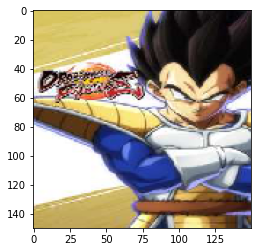

In [57]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [70]:
#Since the value of classes is greater than 0.5, the model predicts it to be VEGETA!
#The prediction is CORRECT!

Saving JyhZpbtu_400x400.jpg to JyhZpbtu_400x400 (1).jpg
[0.32352573]

 This is Goku!



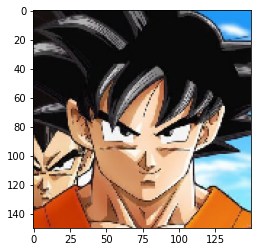

In [56]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [66]:
#Since the value of classes is less than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!

Saving 61-NUVys2bL._SY606_.jpg to 61-NUVys2bL._SY606_ (1).jpg
[0.44253963]

 This is Goku!



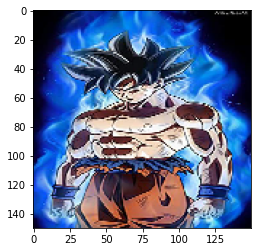

In [55]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [67]:
#Since the value of classes is less than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!

Saving goku-son-2146.jpg to goku-son-2146 (1).jpg
[0.35715866]

 This is Goku!



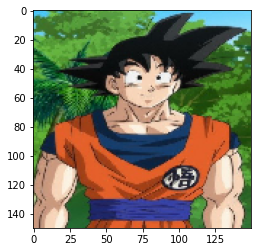

In [53]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [68]:
#Since the value of classes is less than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!

Saving 44243.png to 44243.png
[0.01428238]

 This is Goku!



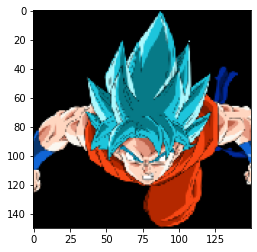

In [52]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [69]:
#Since the value of classes is less than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!

Saving images-2.jpeg to images-2.jpeg
[0.99458104]

 This is Vegeta!



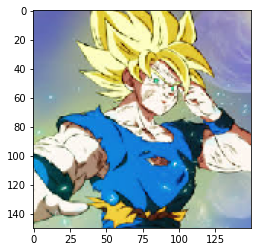

In [61]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [ ]:
#Since the value of classes is greater than 0.5, the model predicts it to be VEGETA!
#The prediction is WRONG!

Saving hpq9cyG.png to hpq9cyG.png
[0.9885091]

 This is Vegeta!



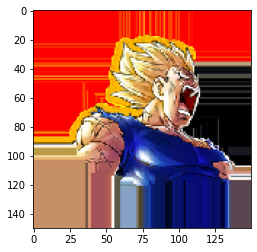

In [62]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [71]:
#Since the value of classes is greater than 0.5, the model predicts it to be VEGETA!
#The prediction is CORRECT!

Saving WylqBDm.png to WylqBDm.png
[0.02658741]

 This is Goku!



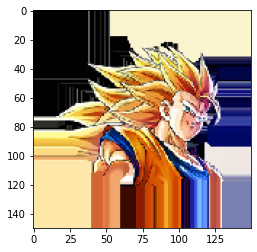

In [72]:
uploaded = files.upload()

for y in uploaded.keys():
 
  # predicting images
  path = '/content/' + y
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print()
  if classes[0]<0.5:
    print(" This is Goku!")
  else:
    print(" This is Vegeta!")
print()
plt.imshow(img)

In [73]:
#Since the value of classes is less than 0.5, the model predicts it to be GOKU!
#The prediction is CORRECT!